####Kalman Filter

Without R

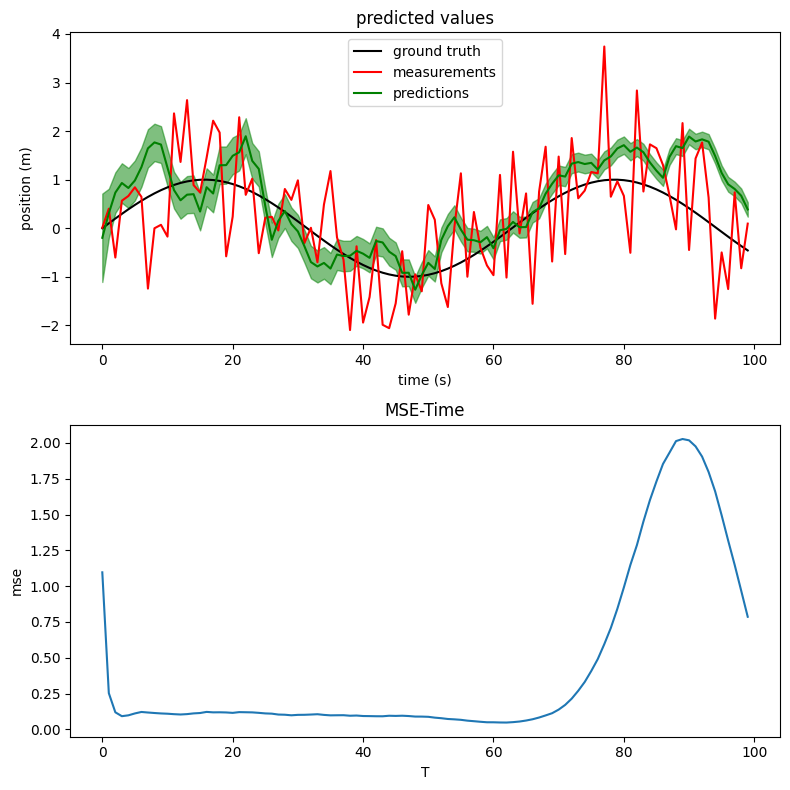

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 0.1, 0, 0],
        [0, 1, 0.1, 0],
        [0, 0, 1, 0.1],
        [0, 0, 0, 1]])
C = np.array([[1, 0, 0, 0]])
mean_ = np.array([5, 1, 0, 0])
cov_ = np.eye(4) * 10
Q = 1.0

def true_position(t):
  return np.sin(0.1 * t)

def kalman_filter(T):
  mean = mean_
  cov = cov_
  x = []
  covx = []
  for t in range(T):
    mean = np.dot(A, mean)
    cov = np.dot(np.dot(A, cov), A.T)

    p = true_position(t) + np.random.normal(0, np.sqrt(Q))
    K = np.dot(np.dot(cov, C.T), np.linalg.inv(np.dot(np.dot(C, cov), C.T) + Q))
    mean = mean + np.dot(K, p - np.dot(C, mean))
    cov = np.dot((np.eye(4) - np.dot(K, C)), cov)

    x.append(mean)
    covx.append(cov)
  return x, covx

T = 100
N = 10000

xx, cx = kalman_filter(T)
t = np.arange(T)
ground_truth = [true_position(i) for i in range(T)]
measurements = [true_position(i) + np.random.normal(0, np.sqrt(Q)) for i in range(T)]


predict_pos_mean = np.array(xx)[:, 0]
predict_pos_std = np.array(cx)[:, 0, 0]

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t, ground_truth, color='k')
plt.plot(t, measurements, color='r')
plt.plot(t, predict_pos_mean, color='g')
plt.fill_between(t, predict_pos_mean - predict_pos_std, predict_pos_mean + predict_pos_std, color='g', alpha=0.5)
plt.legend(("ground truth", "measurements", "predictions"))
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.title("predicted values")


x_true = []
for i in range(T):
  x_true.append(true_position(i))

mse = []
for i in range(N):
  x_estimate, cx = kalman_filter(T)
  x_estimate = np.array(x_estimate)[:, 0]
  mse.append(np.square(np.array(x_true) - np.array(x_estimate)))

mse = np.mean(mse, axis=0) ** 2

plt.subplot(2, 1, 2)
plt.plot(range(T), mse)
plt.xlabel('T')
plt.ylabel('mse')
plt.title('MSE-Time')

plt.tight_layout()
plt.show()

With R

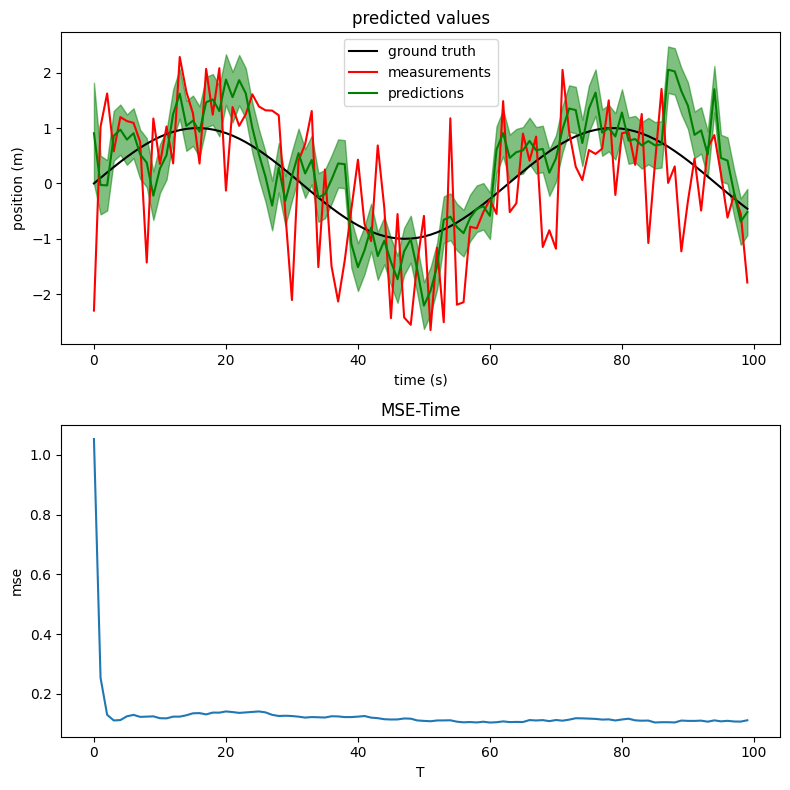

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 0.1, 0, 0],
        [0, 1, 0.1, 0],
        [0, 0, 1, 0.1],
        [0, 0, 0, 1]])
C = np.array([[1, 0, 0, 0]])
mean_ = np.array([5, 1, 0, 0])
cov_ = np.eye(4) * 10
Q = 1.0
R = np.eye(4) * 0.1

def true_position(t):
  return np.sin(0.1 * t)

def kalman_filter(T):
  mean = mean_
  cov = cov_
  x = []
  covx = []
  for t in range(T):
    mean = np.dot(A, mean)
    cov = np.dot(np.dot(A, cov), A.T) + R

    p = true_position(t) + np.random.normal(0, np.sqrt(Q))
    K = np.dot(np.dot(cov, C.T), np.linalg.inv(np.dot(np.dot(C, cov), C.T) + Q))
    mean = mean + np.dot(K, p - np.dot(C, mean))
    cov = np.dot((np.eye(4) - np.dot(K, C)), cov)

    x.append(mean)
    covx.append(cov)
  return x, covx

T = 100
N = 10000

xx, cx = kalman_filter(T)
t = np.arange(T)
ground_truth = [true_position(i) for i in range(T)]
measurements = [true_position(i) + np.random.normal(0, np.sqrt(Q)) for i in range(T)]


predict_pos_mean = np.array(xx)[:, 0]
predict_pos_std = np.array(cx)[:, 0, 0]

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t, ground_truth, color='k')
plt.plot(t, measurements, color='r')
plt.plot(t, predict_pos_mean, color='g')
plt.fill_between(t, predict_pos_mean - predict_pos_std, predict_pos_mean + predict_pos_std, color='g', alpha=0.5)
plt.legend(("ground truth", "measurements", "predictions"))
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.title("predicted values")


x_true = []
for i in range(T):
  x_true.append(true_position(i))

mse = []
for i in range(N):
  x_estimate, cx = kalman_filter(T)
  x_estimate = np.array(x_estimate)[:, 0]
  mse.append(np.square(np.array(x_true) - np.array(x_estimate)))

mse = np.mean(mse, axis=0) ** 2

plt.subplot(2, 1, 2)
plt.plot(range(T), mse)
plt.xlabel('T')
plt.ylabel('mse')
plt.title('MSE-Time')

plt.tight_layout()
plt.show()

Scalar system

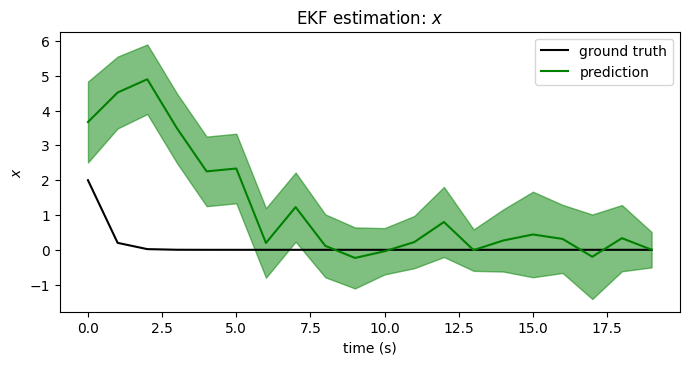

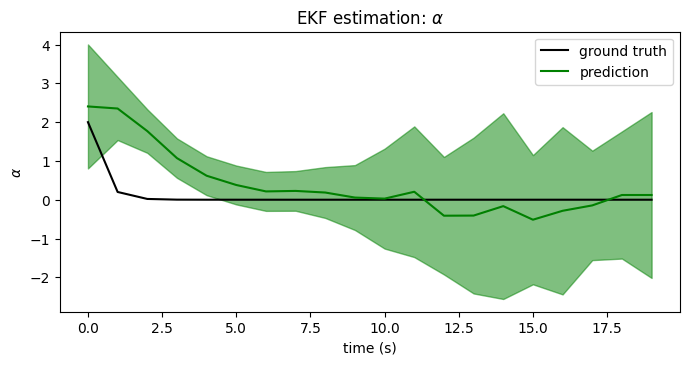

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(50)

Q = 1
R = 0.5
T = 20
alpha_true = 0.1
x0_true = 2

alpha_ = 2
mu_ = 1
var_ = 2

mean_ = np.array([mu_, alpha_])
cov_ = np.diag([var_, var_])

def kalman_filter(T):
    x_m = []
    cov_m = []
    mean = mean_
    cov = cov_
    mu = mu_
    alpha = alpha_
    x = x0_true
    #print(alpha)

    g = np.array([alpha * mu, alpha], dtype=float).reshape(-1, 1)
    G = np.array([[alpha, x0_true],
            [0, 1]], dtype=float)
    h = np.sqrt((alpha*mu) ** 2 + 1)
    H = np.array([(x0_true / np.sqrt(x0_true ** 2 + 1)), 0], dtype=float).reshape(1, -1)
    #print(H)

    for t in range(T):
      #predict
      mean = g
      cov = np.dot(np.dot(G, cov), G.T) + np.eye(2) * R
      z = np.sqrt((alpha * x0_true) ** 2 + 1) + np.random.normal(0, np.sqrt(R))
      K = np.dot(np.dot(cov, H.T), np.linalg.inv(np.dot(np.dot(H, cov), H.T) + Q))
      mean = mean + np.dot(K, z - h)
      cov = np.dot((np.eye(2) - np.dot(K, H)), cov)

      x_m.append(mean)
      cov_m.append(cov)

      # update
      mu = mu * alpha
      x = alpha * x + np.random.normal(0, np.sqrt(R))
      alpha = mean[1, 0]
      g = np.array([(alpha * mu), alpha], dtype=float).reshape(-1, 1)
      G = np.array([[alpha, x],
              [0, 1]], dtype=float)
      #print(mean)
      #print(alpha)
      #print(G)
      h = np.sqrt((alpha*mu) ** 2 + 1)
      H = np.array([(x / np.sqrt(x ** 2 + 1)), 0], dtype=float).reshape(1, -1)

    return x_m, cov_m

ground_truth = np.zeros(T)
measurements = np.zeros(T)

x_t = x0_true
for t in range(T):
    ground_truth[t] = x_t
    measurements[t] = x_t + np.random.normal(0, np.sqrt(R))
    x_t = alpha_true * x_t

xx, cx = kalman_filter(T)

predict_pos_mean = np.array(xx)[:, 0].flatten()
predict_pos_std = np.array(cx)[:, 0, 0]

t = np.arange(T)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(t, ground_truth, color='k')
plt.plot(t, predict_pos_mean, color='g')
plt.fill_between(t, predict_pos_mean - predict_pos_std, predict_pos_mean + predict_pos_std, color='g', alpha=0.5)
plt.legend(("ground truth", "prediction"))
plt.xlabel("time (s)")
plt.ylabel(r"$x$")
plt.title(r"EKF estimation: $x$")

predict_pos_mean = np.array(xx)[:, 0].flatten()
predict_pos_std = np.array(cx)[:, 0, 0]

predict_A_mean = np.array(xx)[:, 1].flatten()
predict_A_std = np.array(cx)[:, 1, 1]

t = np.arange(T)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(t, ground_truth, color='k')
plt.plot(t, predict_A_mean, color='g')
plt.fill_between(t, predict_A_mean - predict_A_std, predict_A_mean + predict_A_std, color='g', alpha=0.5)
plt.legend(("ground truth", "prediction"))
plt.xlabel("time (s)")
plt.ylabel(r"$\alpha$")
plt.title(r"EKF estimation: $\alpha$")

plt.show()
